In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [2]:
df =pd.read_csv("Salary Data.csv")


In [3]:
df.shape

(375, 6)

In [4]:
df.describe() #yesma count 373 xa mathi chai 375 aako xa so there are 3 missing values vanera tha hunxa tyo hatauna lai we use dropna()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df=df.dropna()

In [6]:
df.shape #size milyo

(373, 6)

In [7]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [9]:
# Checking Null values
df.isnull().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
# There are no NULL values in the dataset, hence it is clean.

In [11]:
#checking how many values are there for category "JOB TITLE"
set(df['Job Title'])

{'Account Manager',
 'Accountant',
 'Administrative Assistant',
 'Business Analyst',
 'Business Development Manager',
 'Business Intelligence Analyst',
 'CEO',
 'Chief Data Officer',
 'Chief Technology Officer',
 'Content Marketing Manager',
 'Copywriter',
 'Creative Director',
 'Customer Service Manager',
 'Customer Service Rep',
 'Customer Service Representative',
 'Customer Success Manager',
 'Customer Success Rep',
 'Data Analyst',
 'Data Entry Clerk',
 'Data Scientist',
 'Digital Content Producer',
 'Digital Marketing Manager',
 'Director',
 'Director of Business Development',
 'Director of Engineering',
 'Director of Finance',
 'Director of HR',
 'Director of Human Capital',
 'Director of Human Resources',
 'Director of Marketing',
 'Director of Operations',
 'Director of Product Management',
 'Director of Sales',
 'Director of Sales and Marketing',
 'Event Coordinator',
 'Financial Advisor',
 'Financial Analyst',
 'Financial Manager',
 'Graphic Designer',
 'HR Generalist',
 'HR 

In [12]:
#lastei dherai categories of job title xa so teslai naleko 
#this is because dherai categories vayo vane tyo attribute ko dherai hudaina
auto=df[['Age', 'Gender', 'Education Level', 'Years of Experience',
       'Salary']]

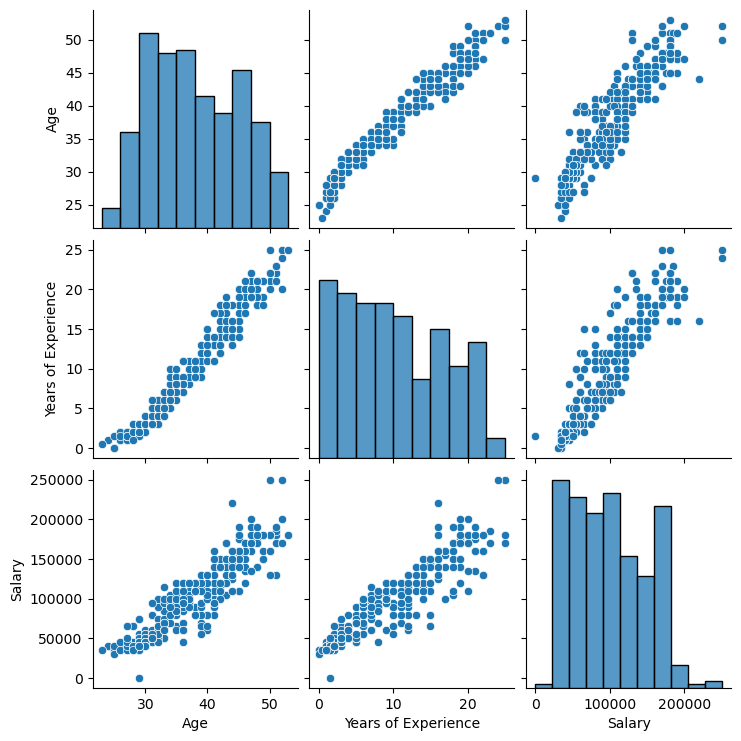

In [13]:
sns.pairplot(auto)

In [14]:
auto

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0
371,43.0,Male,Master's,19.0,170000.0
372,29.0,Female,Bachelor's,2.0,40000.0
373,34.0,Male,Bachelor's,7.0,90000.0


In [15]:
#as mathi savai numeric xaina so converting Gender and Education to numeric

In [16]:
#Encoding the gender attributes using one hot encoding and dimensionality reduction
gender = pd.get_dummies(auto['Gender'], drop_first = True)
gender

,Male
0,1
1,0
2,1
3,0
4,1
...,...
370,0
371,1
372,0
373,1


In [17]:
#gender lai encode garem teslai aaba concatinate garne in order to convert categorial data to numeric data
auto = pd.concat([auto, gender], axis = 1)
auto

,Age,Gender,Education Level,Years of Experience,Salary,Male
0,32.0,Male,Bachelor's,5.0,90000.0,1
1,28.0,Female,Master's,3.0,65000.0,0
2,45.0,Male,PhD,15.0,150000.0,1
3,36.0,Female,Bachelor's,7.0,60000.0,0
4,52.0,Male,Master's,20.0,200000.0,1
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0,0
371,43.0,Male,Master's,19.0,170000.0,1
372,29.0,Female,Bachelor's,2.0,40000.0,0
373,34.0,Male,Bachelor's,7.0,90000.0,1


In [18]:
#Encoding the EDucation level attributes using one hot encoding 
education = pd.get_dummies(auto['Education Level'], drop_first = False) #yo 2ta vanda dherai xa and if drop_first=1 xa vane teslai remove gardinxa which we dont want
education

,Bachelor's,Master's,PhD
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
370,1,0,0
371,0,1,0
372,1,0,0
373,1,0,0


In [19]:
# adding the encoded values into the data 
auto = pd.concat([auto, education], axis = 1)
auto

,Age,Gender,Education Level,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
0,32.0,Male,Bachelor's,5.0,90000.0,1,1,0,0
1,28.0,Female,Master's,3.0,65000.0,0,0,1,0
2,45.0,Male,PhD,15.0,150000.0,1,0,0,1
3,36.0,Female,Bachelor's,7.0,60000.0,0,1,0,0
4,52.0,Male,Master's,20.0,200000.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0,0,1,0,0
371,43.0,Male,Master's,19.0,170000.0,1,0,1,0
372,29.0,Female,Bachelor's,2.0,40000.0,0,1,0,0
373,34.0,Male,Bachelor's,7.0,90000.0,1,1,0,0


In [20]:
#hami saga 2ta gender ra education ko column xa teslai hatauna yo gareko 
auto = auto.drop(['Gender','Education Level'],axis = 1) #axis vaneko chai column ma add gara vaneko if 0 thyo vane row ma add garthyo
auto

,Age,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
0,32.0,5.0,90000.0,1,1,0,0
1,28.0,3.0,65000.0,0,0,1,0
2,45.0,15.0,150000.0,1,0,0,1
3,36.0,7.0,60000.0,0,1,0,0
4,52.0,20.0,200000.0,1,0,1,0
...,...,...,...,...,...,...,...
370,35.0,8.0,85000.0,0,1,0,0
371,43.0,19.0,170000.0,1,0,1,0
372,29.0,2.0,40000.0,0,1,0,0
373,34.0,7.0,90000.0,1,1,0,0


In [21]:
auto.corr()

,Age,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
Age,1.000000,0.979128,0.922335,-0.020324,-0.541733,0.281897,0.411183
Years of Experience,0.979128,1.000000,0.930338,0.002884,-0.573775,0.306961,0.424752
Salary,0.922335,0.930338,1.000000,0.071106,-0.657181,0.362061,0.473073
Male,-0.020324,0.002884,0.071106,1.000000,0.049259,-0.036219,-0.023827
Bachelor's,-0.541733,-0.573775,-0.657181,0.049259,1.000000,-0.731944,-0.487964
Master's,0.281897,0.306961,0.362061,-0.036219,-0.731944,1.000000,-0.237577
PhD,0.411183,0.424752,0.473073,-0.023827,-0.487964,-0.237577,1.000000


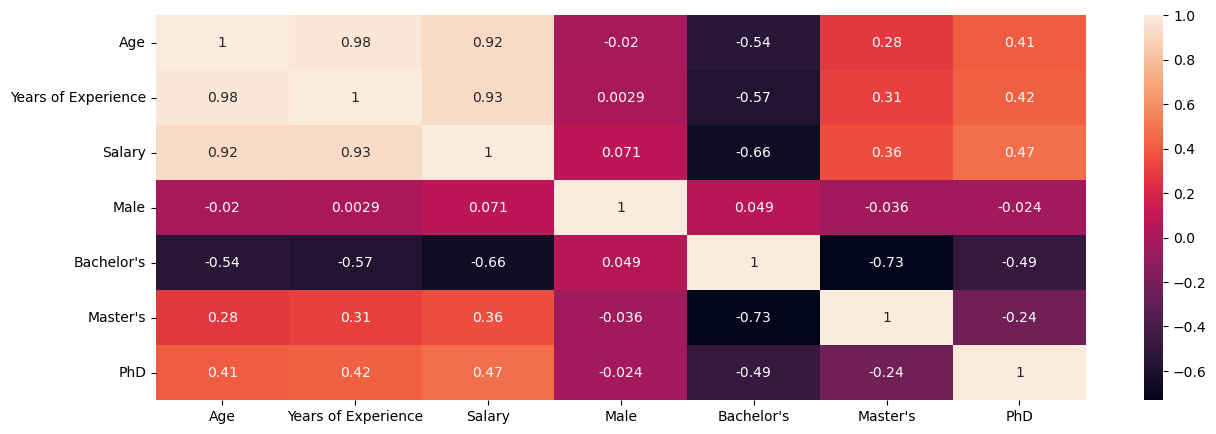

In [22]:
# Starting machine learning

#Correlation plot garya
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [23]:
#mathi herda male ko correlation thorei xa tei vayera teslai drop gareko
auto = auto.drop(['Male'],axis = 1)
auto

,Age,Years of Experience,Salary,Bachelor's,Master's,PhD
0,32.0,5.0,90000.0,1,0,0
1,28.0,3.0,65000.0,0,1,0
2,45.0,15.0,150000.0,0,0,1
3,36.0,7.0,60000.0,1,0,0
4,52.0,20.0,200000.0,0,1,0
...,...,...,...,...,...,...
370,35.0,8.0,85000.0,1,0,0
371,43.0,19.0,170000.0,0,1,0
372,29.0,2.0,40000.0,1,0,0
373,34.0,7.0,90000.0,1,0,0


In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [25]:
df_train.shape

(317, 6)

In [26]:
df_test.shape

(56, 6)

In [27]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['Age','Years of Experience',"Bachelor's",
                    "Master's","PhD"]]
y_train = df_train['Salary']
# df_test_predict = X_train.iloc[0:1]
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# model.predict(df_test_predict)

In [28]:
df_test

,Age,Years of Experience,Salary,Bachelor's,Master's,PhD
67,31.0,5.0,45000.0,1,0,0
348,28.0,1.0,35000.0,1,0,0
343,41.0,14.0,150000.0,1,0,0
295,33.0,4.0,60000.0,1,0,0
90,36.0,11.0,120000.0,0,0,1
298,30.0,2.0,40000.0,1,0,0
167,46.0,18.0,150000.0,0,0,1
323,47.0,20.0,180000.0,0,0,1
65,38.0,10.0,90000.0,0,1,0
150,29.0,3.0,45000.0,1,0,0


In [29]:
#Testing values from the test datasets to check model
data = df_test.iloc[10:11]
actual_salary = data.pop('Salary')#hamilai salary predict garna parne ho tei vayera salary lai pop gareko

# print(data)

predicted_salary = model.predict(data)
print("Actual Salary",actual_salary)
print("predicted Salary",predicted_salary)
data
# print(df_test.iloc[0:1])

Actual Salary 314    85000.0
Name: Salary, dtype: float64
predicted Salary [80297.64326552]


,Age,Years of Experience,Bachelor's,Master's,PhD
314,35.0,8.0,1,0,0


In [30]:
df_test.describe()

,Age,Years of Experience,Salary,Bachelor's,Master's,PhD
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,38.107143,10.366071,102321.428571,0.517857,0.250000,0.232143
std,7.335291,6.679338,50909.583717,0.504203,0.436931,0.426021
min,25.000000,0.000000,35000.000000,0.000000,0.000000,0.000000
25%,31.000000,3.000000,50000.000000,0.000000,0.000000,0.000000
50%,39.000000,12.000000,100000.000000,1.000000,0.000000,0.000000
75%,44.000000,16.000000,150000.000000,1.000000,0.250000,0.000000
max,52.000000,21.000000,200000.000000,1.000000,1.000000,1.000000


In [38]:
def Input():
    
    data={'Age':[],
          'Years of Experience':[],
          "Bachelor's":[0],
          "Master's":[0],
          "PhD":[0]
          }

    age=int(input("Enter the age of recruit "))
    yoe=int(input("Enter the experience in years "))
    data['Age']=[age]
    data['Years of Experience']=[yoe]
    edu=input("Enter education level (B) for Bachelor's, (M) for Master's and (P) for Phd")
    edu=str.upper(edu)
    if edu=='B':
        data["Bachelor's"]=[1]
    elif edu=='M':
        data["Master's"]=[1]
    elif edu=='P':
        data["PhD"]=[1]
    else:
        print("Invalid choice")
    df=pd.DataFrame(data)
    predicted_salary = model.predict(df)
    print(data)
    print("predicted Salary",predicted_salary)

In [39]:
# # if we want to enter data and check by ourselves then;
# # dictionary banaune
# data={'Age':[40],
#       'Years of Experience':[10.5],
#       "Bachelor's":[0],
#       "Master's":[0],
#       "PhD":[1]
#       }
# df=pd.DataFrame(data)
# predicted_salary = model.predict(df)
# print("Actual Salary",actual_salary)
# print("predicted Salary",predicted_salary)

In [40]:
Input()

Enter the age of recruit 40
Enter the experience in years 5
Enter education level (B) for Bachelor's, (M) for Master's and (P) for Phdm
{'Age': [40], 'Years of Experience': [5], "Bachelor's": [0], "Master's": [1], 'PhD': [0]}
predicted Salary [101008.48411127]


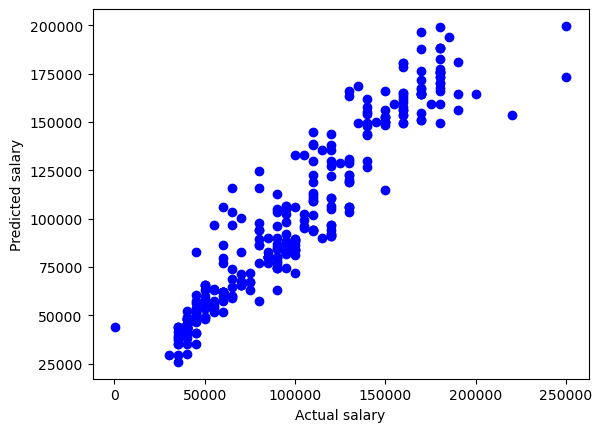

In [41]:
#to observe the performance of the model ytrain ra predicted value of xtrain ko difference


plt.scatter(y_train,model.predict(X_train),color='b')
plt.xlabel('Actual salary')
plt.ylabel('Predicted salary')
plt.show()

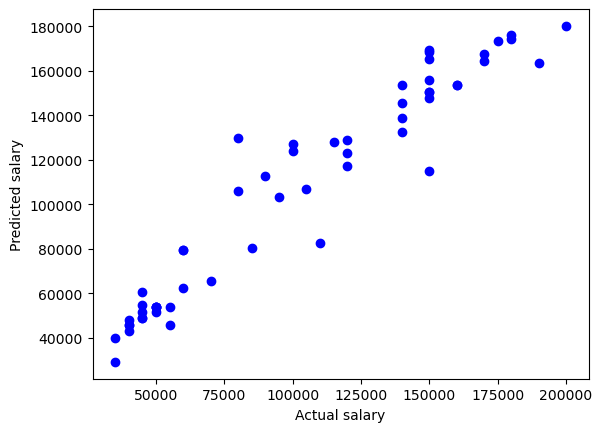

In [42]:
#to observe and compare ytest and predicted value of xtest
X_test = df_test[['Age','Years of Experience',"Bachelor's",
                    "Master's","PhD"]]
y_test = df_test['Salary']

plt.scatter(y_test,model.predict(X_test),color='b')
plt.xlabel('Actual salary')
plt.ylabel('Predicted salary')
plt.show()